In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [18]:
income_statement = pd.read_csv('/home/hunyadi95/p/viz_p/data/Income Statement.csv',header= 1,index_col=0, na_values=['NaN','NM']).round(decimals=2)

In [7]:
balance_sheet = pd.read_csv('/home/hunyadi95/p/viz_p/data/Balance Sheet.csv',header= 1,index_col=0, na_values=['NaN','NM']).round(decimals=2)

In [5]:
cash_flow = pd.read_csv('/home/hunyadi95/p/viz_p/data/Cash Flow Statement.csv',header= 1,index_col=0, na_values=['NaN','NM']).round(decimals=2)

In [6]:
valuation_ratios=pd.read_csv('/home/hunyadi95/p/viz_p/data/Valuation Ratios.csv',header= 1,index_col=0, na_values=['NaN','NM']).round(decimals=2)

/tmp/ipykernel_31963/4180550869.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=income_statement.columns.str.slice(0,7), rotation=60)


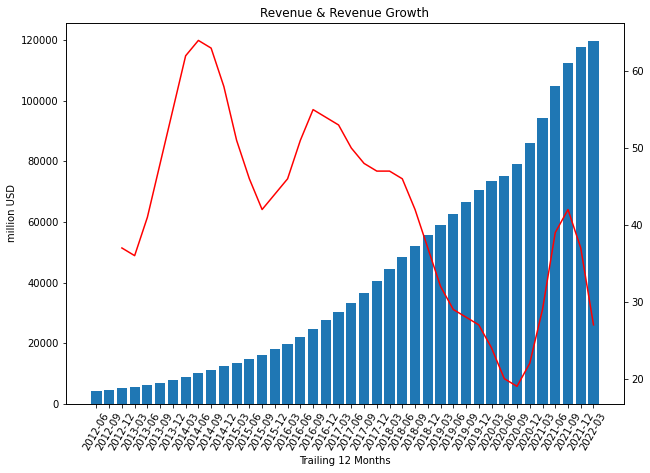

In [76]:
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(income_statement.columns,income_statement.loc['Revenue'].values,)
ax.set(title="Revenue & Revenue Growth",xlabel='Trailing 12 Months',ylabel='million USD')
ax.set_xticklabels(labels=income_statement.columns.str.slice(0,7), rotation=60)
ax2=ax.twinx()
ax2.plot(income_statement.loc['Revenue Growth (YoY)'].values*100,color='r')
plt.show()
# fig.savefig('Revenue.png')

/tmp/ipykernel_31963/1752452123.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(income_statement.columns.str.slice(0,7),rotation=60)


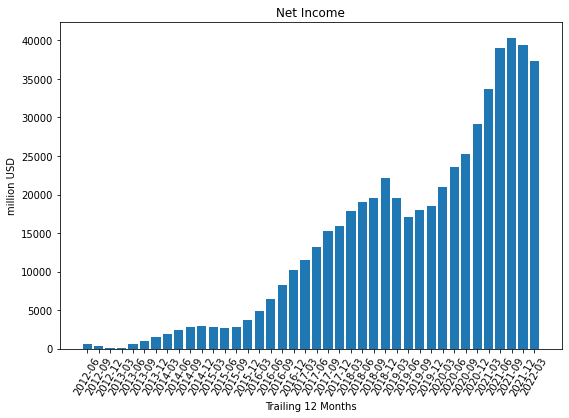

In [16]:
fig, ax = plt.subplots(figsize=(9,6))
ax.bar(income_statement.columns ,income_statement.loc['Net Income to Company'].values,)
ax.set(title="Net Income",xlabel='Trailing 12 Months',ylabel='million USD')
ax.set_xticklabels(income_statement.columns.str.slice(0,7),rotation=60)
plt.show()


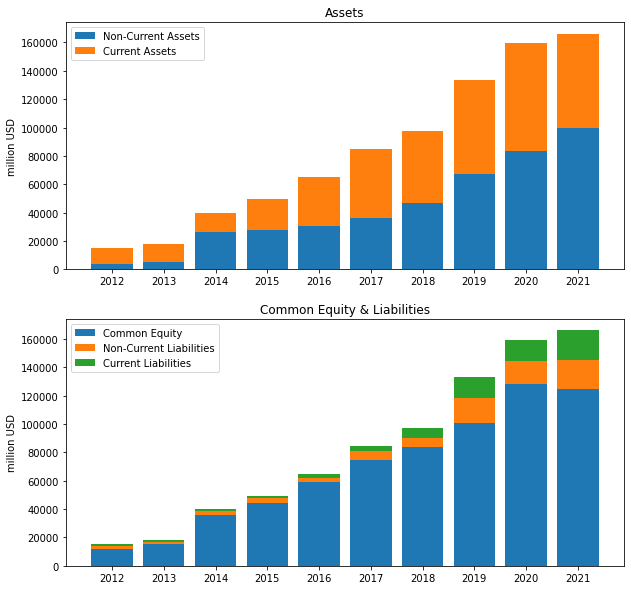

In [70]:
non_current_assets = balance_sheet.loc['Total Assets'].values - balance_sheet.loc['Total Current Assets'].values
non_current_liabilities= balance_sheet.loc['Total Liabilities'].values - balance_sheet.loc['Total Current Liabilities'].values


fig, (ax1,ax2)=plt.subplots(figsize=(10,10), ncols=1, nrows=2)
ax1.bar(balance_sheet.columns.str.slice(0,4), non_current_assets, label= 'Non-Current Assets')
ax1.bar(balance_sheet.columns.str.slice(0,4), balance_sheet.loc['Total Current Assets'].values, label= 'Current Assets', bottom=non_current_assets)
ax1.set(title='Assets', ylabel='million USD')
ax1.legend()
ax2.bar(balance_sheet.columns.str.slice(0,4), balance_sheet.loc['Common Equity'],label='Common Equity')
ax2.bar(balance_sheet.columns.str.slice(0,4), non_current_liabilities ,label='Non-Current Liabilities', bottom=balance_sheet.loc['Common Equity'])
ax2.bar(balance_sheet.columns.str.slice(0,4), balance_sheet.loc['Total Current Liabilities'],label='Current Liabilities', bottom=balance_sheet.loc['Common Equity']+non_current_liabilities)
ax2.set(title='Common Equity & Liabilities', ylabel='million USD')
ax2.legend()
plt.show()